In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [31]:
def first_number(error):
    error = str(error)
    if "e" in error:
        return error[0]
    else:
        error = error.strip("0.")
        return error[0]

### Acceptance rates

In [16]:
def acc_rates(a_list,start=1,size=10,lamb=0.0):
    plt.figure(figsize=(15,5))
    for a in a_list:
        epsilons = np.arange(0,2.2,0.2)
        acc_rates = []
        stderrs = []
        for epsilon in epsilons:
            df = pd.read_csv(f"./Datos/Oscillator/acc_rates/start_{start}_eps_{epsilon:0.2f}_size_{size}_a_{a:0.2f}_lambda_{lamb:0.2f}.csv")


            acc_rates += [df["acc_rate"].mean()]
            stderrs += [np.sqrt(df["acc_rate"].var()/len(df))]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a:0.2f}")
    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb:0.2f}\n  size={size}, start={start}, samples = 1000")
    plt.xticks(np.arange(0,2.2,0.1))
    plt.grid()
    plt.legend()
    plt.show()

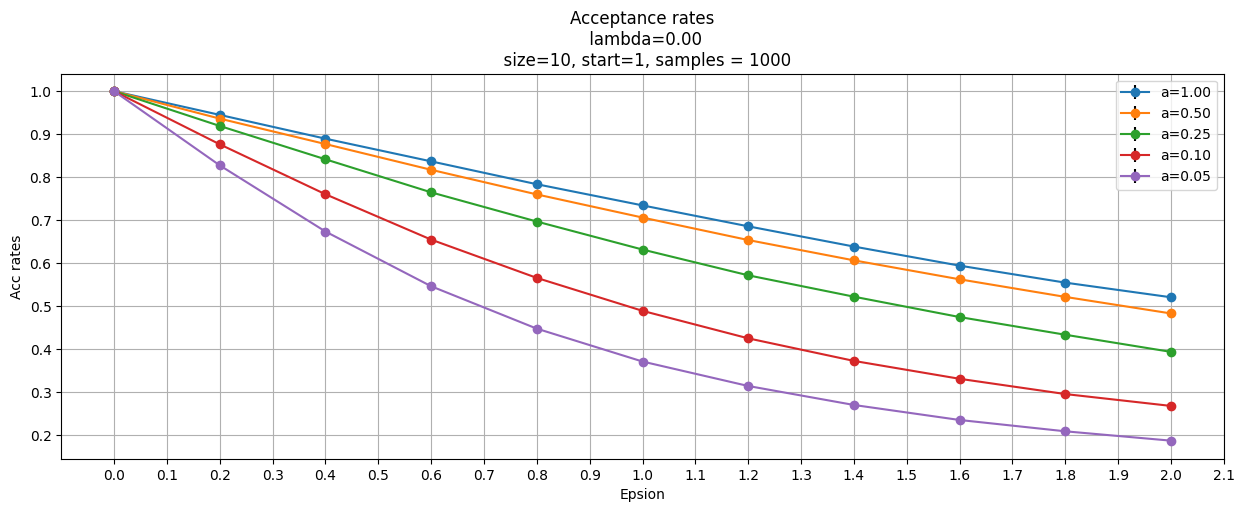

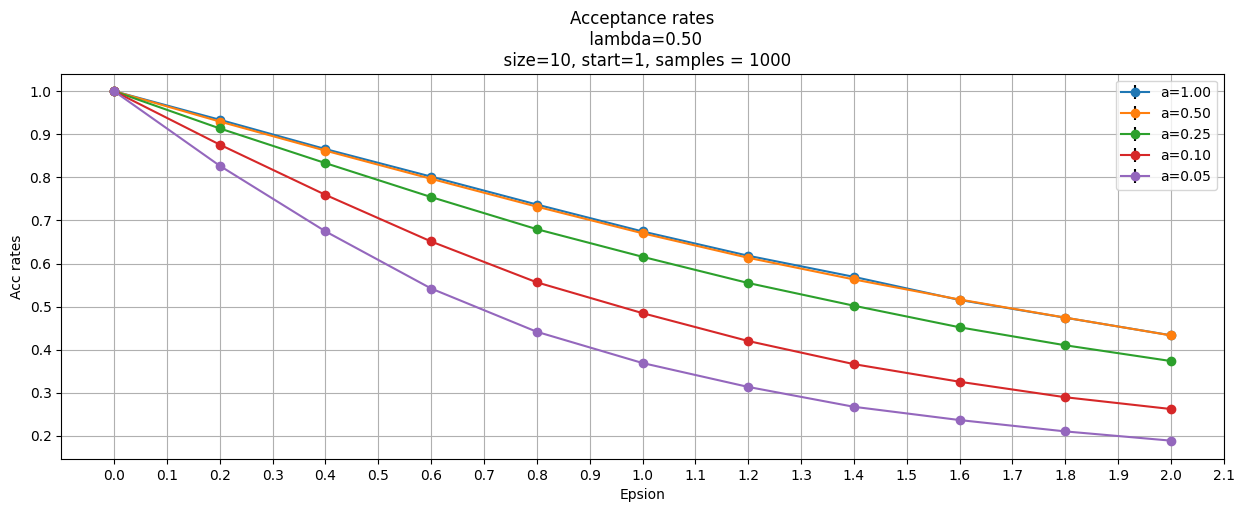

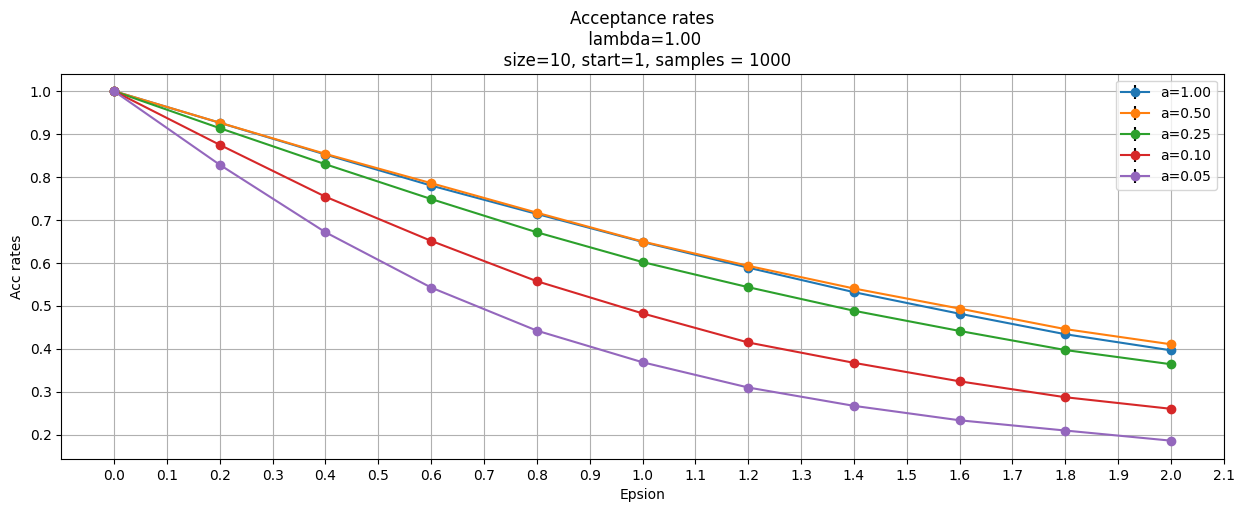

In [17]:
a_list = [1.0,0.5,0.25,0.1,0.05]
acc_rates(a_list,lamb=0.0)
acc_rates(a_list,lamb=0.5)
acc_rates(a_list,lamb=1.0)

In [46]:
eps_dic={
    "lamb_0.0":{
        "1.0":0.75,
        "0.5":0.65,
        "0.25":0.5,
        "0.1":0.33,
        "0.05":0.24
    },
    "lamb_0.5":{
        "1.0":0.75,
        "0.5":0.65,
        "0.25":0.5,
        "0.1":0.33,
        "0.05":0.24
    },
    "lamb_1.0":{
        "1.0":0.75,
        "0.5":0.65,
        "0.25":0.5,
        "0.1":0.33,
        "0.05":0.24
    }
}

def epsilon_opt(lamb,a):
    return eps_dic[f"lamb_{str(lamb)}"][f"{str(a)}"]

In [47]:
def epsilon_opt(lamb,a):
    return eps_dic[f"lamb_{str(lamb)}"][f"{str(a)}"]

epsilon_opt(lamb=0.0,a=1.0)


0.75

### Action vs sweeps


In [269]:
def hot_cold(lamb):
    df = pd.read_csv(f"./Datos/Oscillator/SE/lambda_{lamb}.csv")
    
    y0 = df["SE_cold"]
    y1 = df["SE_hot"]

    plt.figure(figsize=(20,5))
    plt.plot(y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.2f}$\pm${np.sqrt(y0.var()/len(y0)):0.2f}")
    plt.plot(y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.2f}$\pm${np.sqrt(y1.var()/len(y1)):0.2f}")

    plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    plt.title("S_E vs sweeps\nsweeps: 510000\ntermalization: 1000, steps: 10\na=1, measurements = 10000, λ=%s"%(lamb))

    plt.xlabel("sweeps")
    #plt.xlim(10000,11000)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

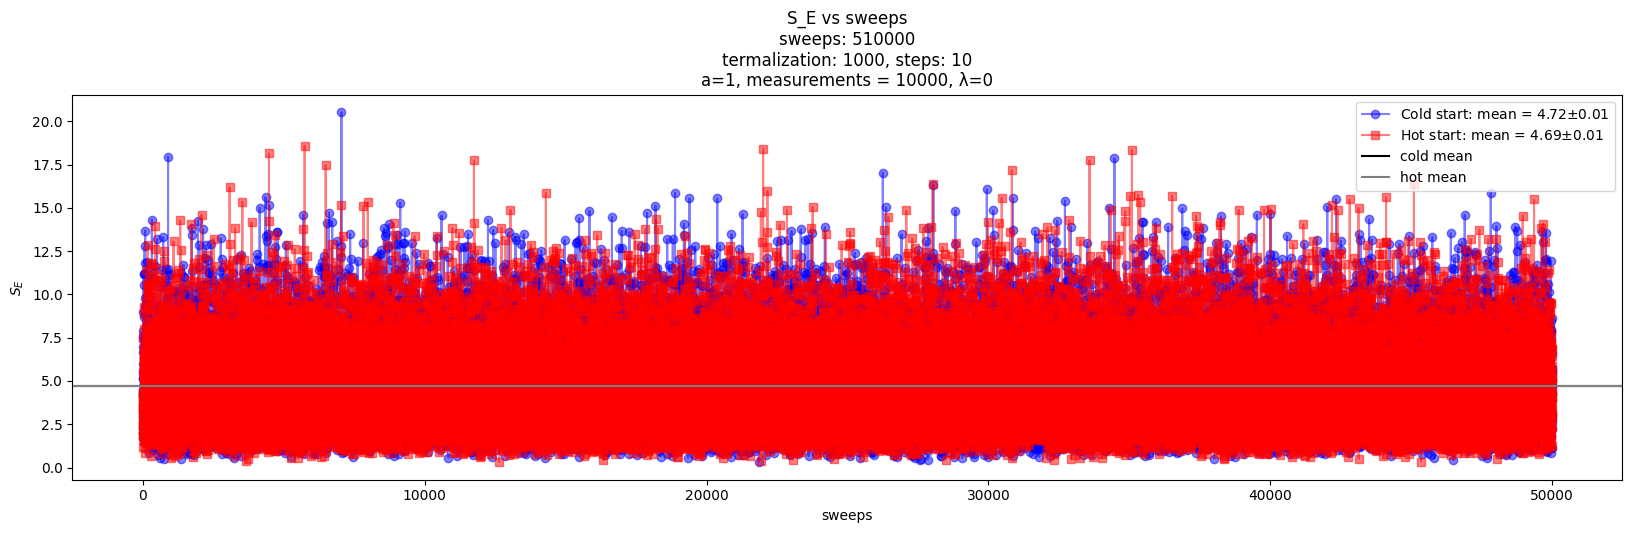

In [276]:
hot_cold(lamb="0")

#hot_cold(lamb="05")
#hot_cold(lamb="1")

In [113]:
def energy_plot(x,y,yerr,lambda_):
    def theoretical_energy(x,a,b):
        return a*x+b

    x_theo = np.lisnpace(0,1,1000)

    popt,pcov = curve_fit(theoretical_energy,x,y,sigma=yerr)

    residuals = (y - theoretical_energy(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err, b_err = np.sqrt(np.diag(pcov))
    a_err, b_err = first_number(a_err), first_number(b_err)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_energy(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"a = {popt[0]}({a_err}), b = {popt[1]}({b_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("$\Delta t$ vs $E_0$\n $\lambda$ = {lambda_}".format(lambda_))
    plt.yabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()

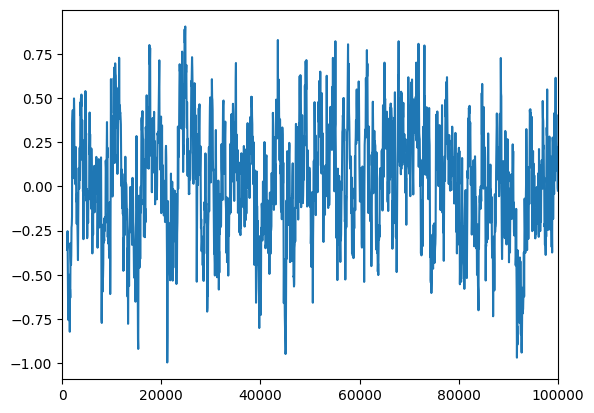

In [20]:
df = pd.read_csv("./Datos/Oscillator/tray_a_1_l_0.csv")

x = df["x0"][1000:100000:50]
plt.plot(x)
plt.xlim(0,100000)
plt.show()

In [ ]:
def corr_plot(x,y,yerr,lambda_):
    def theoretical_corr(x,a,xi):
        return a*np.cosh((x-5)/xi)

    x_theo = np.lisnpace(0,1,1000)

    popt,pcov = curve_fit(theoretical_corr,x,y,sigma=yerr)

    residuals = (y - theoretical_corr(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err, xi_err = np.sqrt(np.diag(pcov))
    a_err, xi_err = first_number(a_err), first_number(xi_err)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_corr(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"a = {popt[0]}({a_err}), $\xi$ = {popt[1]}({xi_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("$\Delta t$ vs $E_0$\n $\lambda$ = {lambda_}".format(lambda_))
    plt.yabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()